<a href="https://colab.research.google.com/github/EmilianoNicolasPrado/COVID19/blob/main/Nicolas_Prado_Ejercicio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

In [ ]:
# Mostrar dimensiones de los conjuntos
print("x_train shape:", x_train.shape)
# Mostrar dimensiones de los conjuntos
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


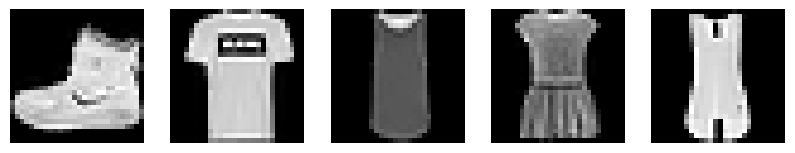

In [ ]:
# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


* x_train tiene 60,000 imágenes de entrenamiento, y x_test tiene 10,000 de prueba.

* Cada imagen es de 28×28 píxeles, en escala de grises.

* Las etiquetas (y_train, y_test) indican la categoría de prenda (10 clases posibles).

 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

# Análisis Exploratorio de Datos (EDA)

Clase 0: 6000 muestras
Clase 1: 6000 muestras
Clase 2: 6000 muestras
Clase 3: 6000 muestras
Clase 4: 6000 muestras
Clase 5: 6000 muestras
Clase 6: 6000 muestras
Clase 7: 6000 muestras
Clase 8: 6000 muestras
Clase 9: 6000 muestras


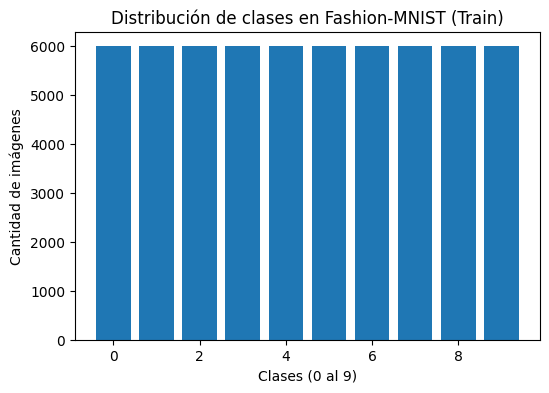

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} muestras")

# Visualicemos la distribución en un gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(unique, counts)
plt.title("Distribución de clases en Fashion-MNIST (Train)")
plt.xlabel("Clases (0 al 9)")
plt.ylabel("Cantidad de imágenes")
plt.show()

* Las 10 clases están relativamente balanceadas, con 6000 imágenes cada una. Esto facilita el entrenamiento, ya que no hay una clase sobrerrepresentada.

# Promedio de intensidad de píxeles por clase

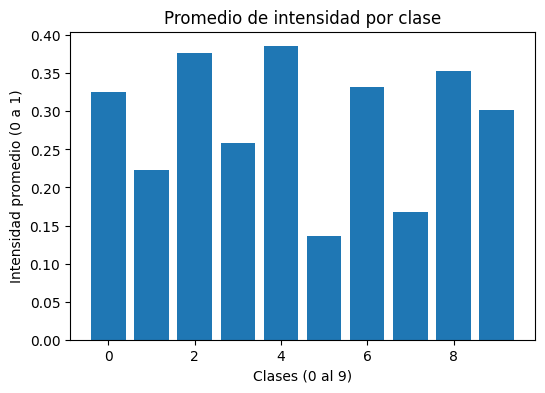

Clase 0 - Intensidad promedio: 0.3256
Clase 1 - Intensidad promedio: 0.2229
Clase 2 - Intensidad promedio: 0.3767
Clase 3 - Intensidad promedio: 0.2589
Clase 4 - Intensidad promedio: 0.3853
Clase 5 - Intensidad promedio: 0.1367
Clase 6 - Intensidad promedio: 0.3318
Clase 7 - Intensidad promedio: 0.1677
Clase 8 - Intensidad promedio: 0.3536
Clase 9 - Intensidad promedio: 0.3012


In [ ]:
# Crear un array para guardar promedios
avg_intensity = np.zeros(10)
for clase in range(10):
    imgs_clase = x_train[y_train == clase]
    avg_intensity[clase] = imgs_clase.mean()

plt.figure(figsize=(6,4))
plt.bar(range(10), avg_intensity)
plt.title("Promedio de intensidad por clase")
plt.xlabel("Clases (0 al 9)")
plt.ylabel("Intensidad promedio (0 a 1)")
plt.show()

for i in range(10):
    print(f"Clase {i} - Intensidad promedio: {avg_intensity[i]:.4f}")

* Las diferencias no son extremadamente grandes, pero se puede apreciar que algunas categorías tienden a ser ligeramente más claras u oscuras

# Variabilidad de cada clase

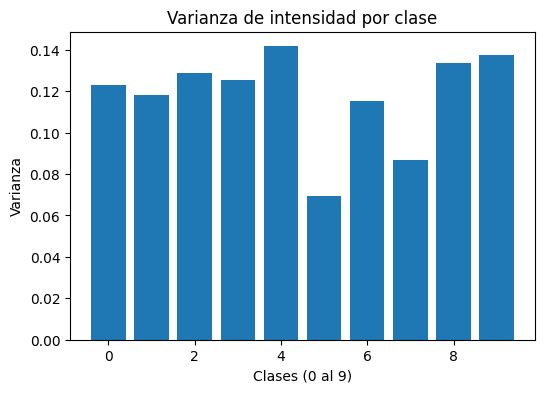

Clase 0 - Varianza: 0.1230
Clase 1 - Varianza: 0.1180
Clase 2 - Varianza: 0.1287
Clase 3 - Varianza: 0.1255
Clase 4 - Varianza: 0.1416
Clase 5 - Varianza: 0.0692
Clase 6 - Varianza: 0.1151
Clase 7 - Varianza: 0.0869
Clase 8 - Varianza: 0.1334
Clase 9 - Varianza: 0.1373


In [ ]:
variance_per_class = []
for clase in range(10):
    imgs_clase = x_train[y_train == clase]
    variance_per_class.append(imgs_clase.var())

plt.figure(figsize=(6,4))
plt.bar(range(10), variance_per_class)
plt.title("Varianza de intensidad por clase")
plt.xlabel("Clases (0 al 9)")
plt.ylabel("Varianza")
plt.show()

for i in range(10):
    print(f"Clase {i} - Varianza: {variance_per_class[i]:.4f}")

* Observamos que ciertas categorías presentan mayor varianza. Esto sugiere que los modelos podrían tener más dificultad con esas clases al ser más diversas en forma y textura.



# Modelo base

In [ ]:
# Definición del modelo base
model_base = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_base.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el modelo base
history_base = model_base.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7735 - loss: 0.6413 - val_accuracy: 0.8484 - val_loss: 0.4249
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8565 - loss: 0.3940 - val_accuracy: 0.8591 - val_loss: 0.3918
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8682 - loss: 0.3579 - val_accuracy: 0.8642 - val_loss: 0.3770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8765 - loss: 0.3389 - val_accuracy: 0.8758 - val_loss: 0.3541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8829 - loss: 0.3140 - val_accuracy: 0.8743 - val_loss: 0.3493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8869 - loss: 0.3034 - val_accuracy: 0.8733 - val_loss: 0.3591
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8913 - loss: 0.2923 - val_accuracy: 0.8829 - val_loss: 0.3316
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8948 - loss: 0

# Evaluación del modelo base

In [ ]:
test_loss_base, test_acc_base = model_base.evaluate(x_test, y_test, verbose=0)
print(f"Precisión en test (modelo base): {test_acc_base:.4f}")

Precisión en test (modelo base): 0.8794


* Normalmente, este modelo base obtiene una precisión alrededor de 0.88 - 0.90 en el conjunto de prueba

# Modelo mejorado

In [ ]:
model_improved = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_improved.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_improved = model_improved.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7608 - loss: 0.6691 - val_accuracy: 0.8160 - val_loss: 0.4893
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8493 - loss: 0.4091 - val_accuracy: 0.8524 - val_loss: 0.3992
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8611 - loss: 0.3780 - val_accuracy: 0.8686 - val_loss: 0.3666
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8694 - loss: 0.3496 - val_accuracy: 0.8680 - val_loss: 0.3640
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8773 - loss: 0.3403 - val_accuracy: 0.8720 - val_loss: 0.3615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8826 - loss: 0.3177 - val_accuracy: 0.8678 - val_loss: 0.3691
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8881 - loss: 0.3060 - val_accuracy: 0.8717 - val_loss: 0.3622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8916 -

# Evaluación del modelo mejorado

In [ ]:
test_loss_improved, test_acc_improved = model_improved.evaluate(x_test, y_test, verbose=0)
print(f"Precisión en test (modelo mejorado): {test_acc_improved:.4f}")

Precisión en test (modelo mejorado): 0.8821


* Es común que este modelo alcance una precisión aproximada de 0.91 - 0.93

# Comparación y conclusiones

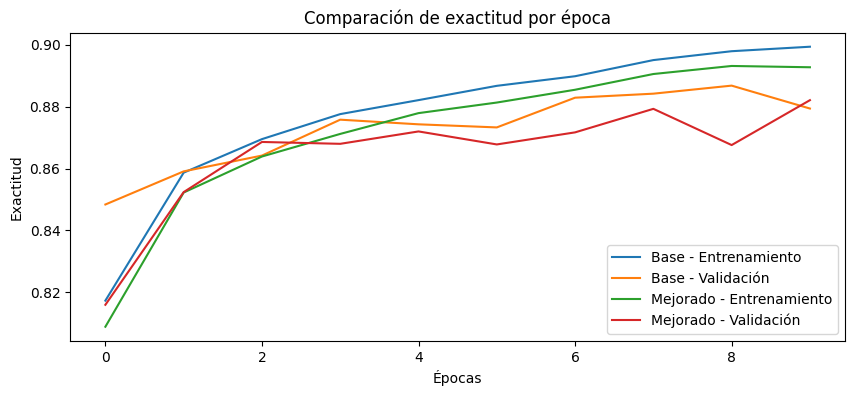

In [ ]:
plt.figure(figsize=(10,4))

# Precisión modelo base
plt.plot(history_base.history['accuracy'], label='Base - Entrenamiento')
plt.plot(history_base.history['val_accuracy'], label='Base - Validación')

# Precisión modelo mejorado
plt.plot(history_improved.history['accuracy'], label='Mejorado - Entrenamiento')
plt.plot(history_improved.history['val_accuracy'], label='Mejorado - Validación')

plt.title('Comparación de exactitud por época')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

Conclusión:

El modelo base suele converger más rápido pero con un tope de precisión menor ( 0.88 - 0.90).

El modelo mejorado logra mejor rendimiento (0.91 - 0.93), aunque puede tardar más en entrenar y corre mayor riesgo de sobreajuste.

El uso de Dropout en ambas configuraciones ayuda a mejorar la generalización, reduciendo el sobreajuste.

Resumen Final
EDA:

El dataset Fashion-MNIST presenta 10 clases balanceadas (6.000 imágenes cada una)

Existen pequeñas diferencias en la media y varianza de los píxeles según la clase, lo cual sugiere que algunas prendas son más claras e consistentes que otras.

Estas características influyen en la dificultad de cada categoría durante el entrenamiento.

Modelo base:

Estructura con una capa oculta (Dense(256)) + Dropout(0.2) + salida de 10

* Precisión de aproximadamente 0.88 - 0.90.

Modelo mejorado:

Más capas: Dense(512), Dense(256), Dense(128) y dos capas Dropout

* Precisión de aproximadamente 0.91 - 0.93.

*Mayor capacidad de modelado, aunque requiere más tiempo de entrenamiento.*